# CS5920J Assignment 3

## 1. wine dataset

#### 1-1. Load the data set into Python

In [354]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [355]:
wine = load_wine()

In [356]:
print("Size of dataset:", wine.data.shape, wine.target.shape)
print("Target names:", wine.target_names)

Size of dataset: (178, 13) (178,)
Target names: ['class_0' 'class_1' 'class_2']


#### 1-2. Divide the dataset into a training set and a test set. Use birthday in the format DDMM as random_state

In [357]:
X_train,X_test,y_train,y_test = train_test_split(wine.data,wine.target,random_state=2409)

#### 1-3. Using cross-validation and the training set only, estimate the generalization accuracy of the SVM with the default values of the parameters

In [358]:
from sklearn.svm import SVC
import numpy as np
svc = SVC()
scores = cross_val_score(svc,X_train,y_train)
train_score = np.mean(scores)
print("Generalization accuracy on training data:", train_score)

Generalization accuracy on training data: 0.6994301994301994


#### Answer for Task 1-3
Generalization accuracy on training data: 0.6994301994301994

#### 1-4. Find the test error rate of the SVM with the default values of parameters

In [359]:
svc.fit(X_train,y_train)
test_score = svc.score(X_test,y_test)
print("Test accuracy:", test_score)
print("Test error rate:", 1-test_score)

Test accuracy: 0.7111111111111111
Test error rate: 0.28888888888888886


#### Answer for Task 1-4
Test error rate: 0.28888888888888886 <br><br>
Test accuracy is a little bit higher than the estimated generalization accuracy on training data, however, accuracy on both training and test sets is pretty low, which means the prediction is not good enough

#### 1-5 & 6. Create a pipeline for SVM involving data normalization and SVC, and use grid search and cross-validation to tune parameters C and gamma for the pipeline. Fit the GridSearchCV object of task 5 to the training set and use it to predict the test labels

In [360]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import GridSearchCV

In [361]:
# 1. MinMaxScaler
pipe = make_pipeline(MinMaxScaler(), SVC())
param_grid = {'svc__C': [0.001,0.01,0.1,1,5,10,100],'svc__gamma': [0.001,0.01,0.1,1,5,10,100]}
grid_minmax = GridSearchCV(pipe,param_grid,cv=5)
grid_minmax.fit(X_train,y_train)
grid_test_score = grid_minmax.score(X_test,y_test)
print("Test set score:", grid_test_score)
print("Test error rate:", 1-grid_test_score)
print("Best parameters:", grid_minmax.best_params_)

Test set score: 0.9777777777777777
Test error rate: 0.022222222222222254
Best parameters: {'svc__C': 10, 'svc__gamma': 0.01}


In [362]:
# 2. StandardScaler
pipe = make_pipeline(StandardScaler(), SVC())
param_grid = {'svc__C': [0.001,0.01,0.1,1,5,10,100],'svc__gamma': [0.001,0.01,0.1,1,5,10,100]}
grid_standard = GridSearchCV(pipe,param_grid,cv=5)
grid_standard.fit(X_train,y_train)
grid_test_score = grid_standard.score(X_test,y_test)
print("Test set score:", grid_test_score)
print("Test error rate:", 1-grid_test_score)
print("Best parameters:", grid_standard.best_params_)

Test set score: 0.9777777777777777
Test error rate: 0.022222222222222254
Best parameters: {'svc__C': 1, 'svc__gamma': 0.01}


In [363]:
# 3. RobustScaler
pipe = make_pipeline(RobustScaler(), SVC())
param_grid = {'svc__C': [0.001,0.01,0.1,1,5,10,100],'svc__gamma': [0.001,0.01,0.1,1,5,10,100]}
grid_robust = GridSearchCV(pipe,param_grid,cv=5)
grid_robust.fit(X_train,y_train)
grid_test_score = grid_robust.score(X_test,y_test)
print("Test set score:", grid_test_score)
print("Test error rate:", 1-grid_test_score)
print("Best parameters:", grid_robust.best_params_)

Test set score: 1.0
Test error rate: 0.0
Best parameters: {'svc__C': 1, 'svc__gamma': 0.01}


In [364]:
# 4. Normalizer
pipe = make_pipeline(Normalizer(), SVC())
param_grid = {'svc__C': [0.001,0.01,0.1,1,5,10,100],'svc__gamma': [0.001,0.01,0.1,1,5,10,100]}
grid_normalizer = GridSearchCV(pipe,param_grid,cv=5)
grid_normalizer.fit(X_train,y_train)
grid_test_score = grid_normalizer.score(X_test,y_test)
print("Test set score:", grid_test_score)
print("Test error rate:", 1-grid_test_score)
print("Best parameters:", grid_normalizer.best_params_)

Test set score: 0.9555555555555556
Test error rate: 0.0444444444444444
Best parameters: {'svc__C': 100, 'svc__gamma': 100}


#### Answer for Task 1-5 & 1-6
RobustScaler performs best on the wine dataset and its best parameters are 'svc__C': 1, 'svc__gamma': 0.01

| Scaler | Test Set Score | Test Error Rate | Best parameters |
| :-: | :-: | :-: | :-: |
| MinMaxScaler | 0.978 | 0.022 | 'svc__C': 10, 'svc__gamma': 0.01 |
| StandardScaler | 0.978 | 0.022 | 'svc__C': 1, 'svc__gamma': 0.01 |
| RobustScaler | 1.0 | 0.0 | 'svc__C': 1, 'svc__gamma': 0.01 |
| Normalizer | 0.956 | 0.044 | 'svc__C': 100, 'svc__gamma': 100 |

#### 7. Implement a cross-conformal predictor

In [295]:
from sklearn.model_selection import KFold
kf = KFold(shuffle=True, random_state=2409, n_splits=5)

In [365]:
# I used RobustScaler and its best parameters as it performed best on the wine dataset (results from task 1-5&1-6)
rank_matrix = np.zeros((len(X_test), 3))

for rest_index, fold_index in kf.split(X_train):
    X_rest, X_fold = X_train[rest_index], X_train[fold_index]
    y_rest, y_fold = y_train[rest_index], y_train[fold_index]
    grid_robust.fit(X_rest, y_rest)
    conformity_scores_fold = grid_robust.decision_function(X_fold)
    alphas_fold = []
    for i in range(len(conformity_scores_fold)):
        alphas_fold.append(conformity_scores_fold[i,y_fold[i]])
    
    conformity_scores_test = grid_robust.decision_function(X_test)

    for j in range(len(conformity_scores_test)):
        for k in range(3):
            rank_matrix[j,k] = rank_matrix[j,k] + np.sum(conformity_scores_test[j,k] > alphas_fold)
            
p_values = (rank_matrix+1) / (len(X_train)+1)

To check its validity, produce a calibration curve

Text(0, 0.5, 'percentage of errors')

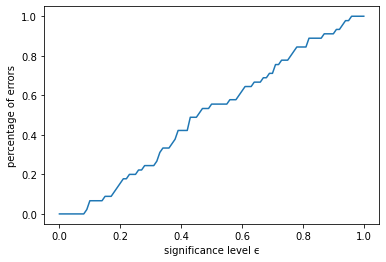

In [366]:
%matplotlib inline
import matplotlib.pyplot as plt

eps = np.arange(0,1.01,0.01)
err = []
for i in range(len(eps)):
    nr_of_error = 0 
    for j in range(len(X_test)):
        if p_values[j,y_test[j]] <= eps[i]:
            nr_of_error += 1
    err.append(nr_of_error/len(X_test))

plt.plot(eps,err)
plt.xlabel("significance level ϵ")
plt.ylabel("percentage of errors")

Compute the average false p-value on the test set

In [367]:
false_p_values = []
for i in range(len(p_values)):   
    false_p_values.append(np.sum(p_values[i]) - p_values[i,y_test[i]])

avg_false_p_values = np.sum(false_p_values) / (len(p_values)*(p_values.shape[1]-1))
print("average false p-value on the test set:", avg_false_p_values)

average false p-value on the test set: 0.01011608623548923


#### Answer for Task 1-7
Average false p-value on the test set: 0.01011608623548923

## 2. USPS dataset

#### 2-1. Load the data set into Python. In the case of the USPS dataset, merge the original training and test sets into one dataset

In [299]:
USPS_X_train = np.genfromtxt("zip.train.gz", usecols=np.arange(1,257))
USPS_X_test = np.genfromtxt("zip.test.gz", usecols=np.arange(1,257))
print("Size of training set:", USPS_X_train.shape)
print("Size of test set:", USPS_X_test.shape)

Size of training set: (7291, 256)
Size of test set: (2007, 256)


In [300]:
USPS_X = np.concatenate((USPS_X_train, USPS_X_test), axis=0)
print("Size of merged data:", USPS_X.shape)

Size of merged data: (9298, 256)


In [321]:
USPS_y_train = np.genfromtxt("zip.train.gz", usecols=0, dtype='int')
USPS_y_test = np.genfromtxt("zip.test.gz", usecols=0, dtype='int')
print("Size of training set labels:", USPS_y_train.shape)
print("Size of test set labels:", USPS_y_test.shape)

Size of training set labels: (7291,)
Size of test set labels: (2007,)


In [327]:
USPS_y = np.concatenate((USPS_y_train, USPS_y_test))
print("Size of merged data labels:", USPS_y.shape)

Size of merged data labels: (9298,)


#### 2-2. Divide the dataset into a training set and a test set. Use birthday in the format DDMM as random_state

In [330]:
X_train,X_test,y_train,y_test = train_test_split(USPS_X,USPS_y,random_state = 2409)

In [304]:
print("Size of resplited training set:", X_train.shape)
print("Size of resplited test set:", X_test.shape)

Size of resplited training set: (6973, 256)
Size of resplited test set: (2325, 256)


#### 2-3. Using cross-validation and the training set only, estimate the generalization accuracy of the SVM with the default values of the parameters

In [305]:
svc = SVC()
scores = cross_val_score(svc,X_train,y_train)
train_score = np.mean(scores)
print("Generalization accuracy on training data:", train_score)

Generalization accuracy on training data: 0.9723216241650083


#### Answer for Task 2-3
Generalization accuracy on training data: 0.9723216241650083

#### 2-4. Find the test error rate of the SVM with the default values of parameters

In [306]:
svc.fit(X_train,y_train)
test_score = svc.score(X_test,y_test)
print("Test accuracy:", test_score)
print("Test error rate:", 1-test_score)

Test accuracy: 0.9690322580645161
Test error rate: 0.030967741935483906


#### Answer for Task 2-4
Test error rate: 0.030967741935483906 <br><br>
Unlike the wine dataset, svm algorithm shows high accuracy on both training (≈ 97.2%) and test (≈ 96.9%) sets on the USPS dataset

####  2-5 & 6. Create a pipeline for SVM involving data normalization and SVC, and use grid search and cross-validation to tune parameters C and gamma for the pipeline. Fit the GridSearchCV object of task 5 to the training set and use it to predict the test labels

In [353]:
# I reduced options for parameters (C and gamma) to reduce the running time
# 1. MinMaxScaler
import time
start_time = time.time()
pipe = make_pipeline(MinMaxScaler(), SVC())
param_grid = {'svc__C': [1,10,100],'svc__gamma': [0.01,0.1,1]}
grid_minmax = GridSearchCV(pipe,param_grid,cv=5)
grid_minmax.fit(X_train,y_train)
grid_test_score = grid_minmax.score(X_test,y_test)
print("Test set score:", grid_test_score)
print("Test error rate:", 1-grid_test_score)
print("Best parameters:", grid_minmax.best_params_)
print(time.time() - start_time, "seconds")

Test set score: 0.9686021505376344
Test error rate: 0.03139784946236557
Best parameters: {'svc__C': 10, 'svc__gamma': 0.01}
1414.3381066322327 seconds


In [309]:
# 2. StandardScaler
start_time = time.time()
pipe = make_pipeline(StandardScaler(), SVC())
param_grid = {'svc__C': [1,10,100],'svc__gamma': [0.01,0.1,1]}
grid_standard = GridSearchCV(pipe,param_grid,cv=5)
grid_standard.fit(X_train,y_train)
grid_test_score = grid_standard.score(X_test,y_test)
print("Test set score:", grid_test_score)
print("Test error rate:", 1-grid_test_score)
print("Best parameters:", grid_standard.best_params_)
print(time.time() - start_time, "seconds")

Test set score: 0.9320430107526881
Test error rate: 0.06795698924731186
Best parameters: {'svc__C': 10, 'svc__gamma': 0.01}
900.0440971851349 seconds


In [310]:
# 3. RobustScaler
start_time = time.time()
pipe = make_pipeline(RobustScaler(), SVC())
param_grid = {'svc__C': [1,10,100],'svc__gamma': [0.01,0.1,1]}
grid_robust = GridSearchCV(pipe,param_grid,cv=5)
grid_robust.fit(X_train,y_train)
grid_test_score = grid_robust.score(X_test,y_test)
print("Test set score:", grid_test_score)
print("Test error rate:", 1-grid_test_score)
print("Best parameters:", grid_robust.best_params_)
print(time.time() - start_time, "seconds")

Test set score: 0.7587096774193548
Test error rate: 0.2412903225806452
Best parameters: {'svc__C': 100, 'svc__gamma': 0.01}
2136.2538986206055 seconds


In [332]:
# 4. Normalizer
start_time = time.time()
pipe = make_pipeline(Normalizer(), SVC())
param_grid = {'svc__C': [1,10,100],'svc__gamma': [0.01,0.1,1]}
grid_normalizer = GridSearchCV(pipe,param_grid,cv=5)
grid_normalizer.fit(X_train,y_train)
grid_test_score = grid_normalizer.score(X_test,y_test)
print("Test set score:", grid_test_score)
print("Test error rate:", 1-grid_test_score)
print("Best parameters:", grid_normalizer.best_params_)
print(time.time() - start_time, "seconds")

Test set score: 0.9698924731182795
Test error rate: 0.03010752688172047
Best parameters: {'svc__C': 10, 'svc__gamma': 1}
558.5801811218262 seconds


#### Answer for Task 2-5 & 2-6
Normalizer performs best (slightly better than MinMaxScaler) on the USPS dataset and its best parameters are 'svc__C': 10, 'svc__gamma': 1

| Scaler | Test Set Score | Test Error Rate | Best parameters |
| :-: | :-: | :-: | :-: |
| MinMaxScaler | 0.969 | 0.031 | 'svc__C': 10, 'svc__gamma': 0.01 |
| StandardScaler | 0.932 | 0.068 | 'svc__C': 10, 'svc__gamma': 0.01 |
| RobustScaler | 0.759 | 0.241 | 'svc__C': 100, 'svc__gamma': 0.01 |
| Normalizer | 0.97 | 0.03 | 'svc__C': 10, 'svc__gamma': 1 |

#### 2-7. Implement a cross-conformal predictor

In [333]:
kf = KFold(shuffle=True, random_state=2409, n_splits=5)

In [350]:
# I used Normalizer as it performed best on the USPS dataset (results from task 2-5&2-6)
start_time = time.time()
rank_matrix = np.zeros((len(X_test), 10))

for rest_index, fold_index in kf.split(X_train):
    X_rest, X_fold = X_train[rest_index], X_train[fold_index]
    y_rest, y_fold = y_train[rest_index], y_train[fold_index]
    grid_normalizer.fit(X_rest, y_rest)
    conformity_scores_fold = grid_normalizer.decision_function(X_fold)
    alphas_fold = []
    for i in range(len(conformity_scores_fold)):
        alphas_fold.append(conformity_scores_fold[i,y_fold[i]])
    
    conformity_scores_test = grid_normalizer.decision_function(X_test)

    for j in range(len(conformity_scores_test)):
        for k in range(10):
            rank_matrix[j,k] = rank_matrix[j,k] + np.sum(conformity_scores_test[j,k] > alphas_fold)
            
p_values = (rank_matrix+1) / (len(X_train)+1)

print(time.time() - start_time, "seconds")

1940.5730383396149 seconds


To check its validity, produce a calibration curve

Text(0, 0.5, 'percentage of errors')

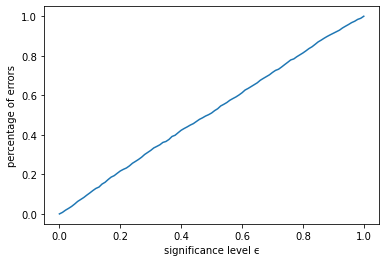

In [351]:
eps = np.arange(0,1.01,0.01)
err = []
for i in range(len(eps)):
    nr_of_error = 0 
    for j in range(len(X_test)):
        if p_values[j,y_test[j]] <= eps[i]:
            nr_of_error += 1
    err.append(nr_of_error/len(X_test))

plt.plot(eps,err)
plt.xlabel("significance level ϵ")
plt.ylabel("percentage of errors")

Compute the average false p-value on the test set

In [352]:
false_p_values = []
for i in range(len(p_values)):   
    false_p_values.append(np.sum(p_values[i]) - p_values[i,y_test[i]])

avg_false_p_values = np.sum(false_p_values) / (len(p_values)*(p_values.shape[1]-1))
print("average false p-value on the test set:", avg_false_p_values)

average false p-value on the test set: 0.004702189631466114


#### Answer for Task 2-7
Average false p-value on the test set: 0.004702189631466114